In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt




In [88]:
df=pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [89]:
df.shape

(1462, 9)

In [90]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [91]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [92]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].fillna("NA")

In [93]:
numeric_columns = list(df.dtypes[df.dtypes != 'object'].index)

for col in numeric_columns:
    df[col] = df[col].fillna(0)

In [94]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [95]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [96]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count','lead_score']

In [97]:
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=1)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=1)

len(df_train), len(df_val), len(df_test)

(877, 292, 293)

In [98]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
340,organic_search,education,3,69033.0,self_employed,north_america,1,0.43,1
596,organic_search,education,3,0.0,student,middle_east,0,0.52,1
457,events,education,1,68118.0,student,north_america,7,0.87,1
175,social_media,finance,0,65044.0,self_employed,africa,5,0.53,1
549,paid_ads,NA,5,48327.0,employed,north_america,0,0.89,1


In [99]:
df_test.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
719,organic_search,technology,1,0.0,employed,middle_east,2,0.90,0
1223,organic_search,retail,1,63548.0,NA,europe,4,0.81,1
336,NA,manufacturing,1,50616.0,unemployed,europe,5,0.63,1
741,NA,technology,2,70002.0,NA,south_america,3,0.06,0
401,social_media,retail,3,64969.0,employed,north_america,1,0.18,0


In [100]:
df_val.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
528,social_media,technology,3,59337.0,unemployed,africa,2,0.58,1
51,organic_search,technology,2,72662.0,employed,NA,2,0.76,1
1331,referral,education,2,58490.0,unemployed,europe,3,0.82,1
1010,paid_ads,other,5,69765.0,self_employed,north_america,2,0.32,1
1240,social_media,technology,2,77835.0,self_employed,africa,3,0.44,1


In [101]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [102]:
auc_scores = {}

for feature in numerical:
    auc = roc_auc_score(y_train, df_train[feature])
    auc_scores[feature] = auc

for feature, auc in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {auc:.3f}")

number_of_courses_viewed: 0.765
interaction_count: 0.727
lead_score: 0.611
annual_income: 0.545


In [103]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [104]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [105]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
converted_cust = (y_pred >= 0.5)
(y_val == converted_cust).mean()

np.float64(0.7636986301369864)

In [106]:
roc_auc_score(y_val, y_pred)

0.7944791666666666

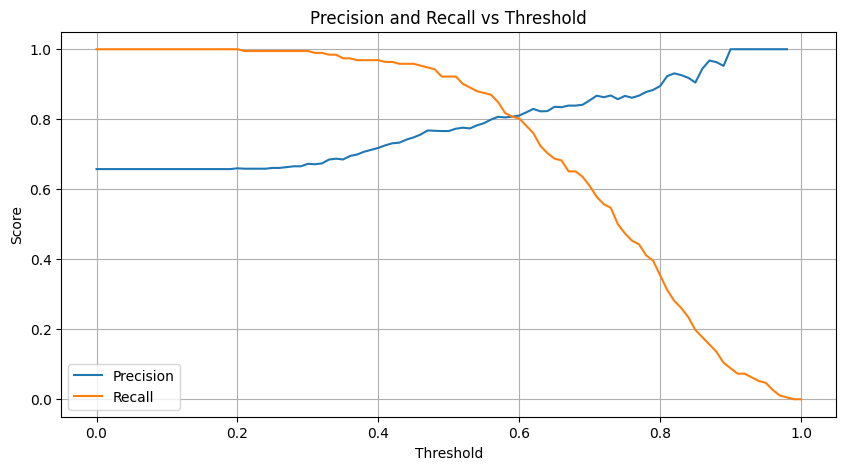

In [107]:
thresholds = np.arange(0.0, 1.01, 0.01)


precisions = []
recalls = []

for thresh in thresholds:
    preds = (y_pred>= thresh).astype(int)
    
    if preds.sum() == 0:
        precisions.append(np.nan)
    else:
        precisions.append(precision_score(y_val, preds))
    recalls.append(recall_score(y_val, preds))

# Plotting
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()




In [108]:
f1_scores = []

for p, r in zip(precisions, recalls):
    if (p is np.nan) or (r is np.nan) or (p + r == 0):
        f1_scores.append(np.nan)  
    else:
        f1_scores.append(2 * p * r / (p + r))


max_f1_idx = np.nanargmax(f1_scores)
max_f1_thresh = thresholds[max_f1_idx]
max_f1_value = f1_scores[max_f1_idx]
print(f"Max F1 score: {max_f1_value:.3f} at threshold {max_f1_thresh:.2f}")


Max F1 score: 0.848 at threshold 0.47


In [ ]:
df_full_train = pd.concat([df_train, df_val])
y = pd.Series(np.concatenate([y_train, y_val]))


kfold = KFold(n_splits=5, shuffle=True, random_state=1)
auc_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(df_full_train)):
    print(f"Training fold {fold + 1}...")
    
    df_train_fold = df_full_train.iloc[train_idx]
    y_train_fold = y.iloc[train_idx]
    df_val_fold = df_full_train.iloc[val_idx]
    y_val_fold = y.iloc[val_idx]
    
    train_dicts = df_train_fold[categorical + numerical].to_dict(orient='records')
    val_dicts = df_val_fold[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=True)
    X_train_fold = dv.fit_transform(train_dicts)
    X_val_fold = dv.transform(val_dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)
    
    y_val_pred = model.predict_proba(X_val_fold)[:, 1]
    auc = roc_auc_score(y_val_fold, y_val_pred)
    auc_scores.append(auc)
    print(f"Fold {fold + 1} AUC: {auc:.4f}")

mean_auc = np.round(np.mean(auc_scores), 3)
std_auc = np.round(np.std(auc_scores), 3)

print(f"\nMean AUC: {mean_auc}")
print(f"Standard deviation: {std_auc}")
print(f"AUC scores per fold: {auc_scores}")


Training fold 1...
Fold 1 AUC: 0.8067
Training fold 2...
Fold 2 AUC: 0.8068
Training fold 3...
Fold 3 AUC: 0.8648
Training fold 4...
Fold 4 AUC: 0.8334
Training fold 5...
Fold 5 AUC: 0.8154

Mean AUC: 0.825
Standard deviation: 0.022
AUC scores per fold: [0.806680393502631, 0.8067501795260512, 0.8648193508879363, 0.8334380892520429, 0.8153846153846154]


In [ ]:

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
C_values = [0.000001, 0.001, 1]

df_full_train = pd.concat([df_train, df_val])
y = pd.Series(np.concatenate([y_train, y_val]))

results = {}

for C in C_values:
    auc_scores = []
    for fold, (train_idx, val_idx) in enumerate(kfold.split(df_full_train)):
        
        df_train_fold = df_full_train.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        df_val_fold = df_full_train.iloc[val_idx]
        y_val_fold = y.iloc[val_idx]
        
        
        train_dicts = df_train_fold[categorical + numerical].to_dict(orient='records')
        val_dicts = df_val_fold[categorical + numerical].to_dict(orient='records')
        
        
        dv = DictVectorizer(sparse=True)
        X_train_fold = dv.fit_transform(train_dicts)
        X_val_fold = dv.transform(val_dicts)
        
        
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_fold, y_train_fold)
        
        
        y_pred = model.predict_proba(X_val_fold)[:, 1]
        auc = roc_auc_score(y_val_fold, y_pred)
        auc_scores.append(auc)
    
    mean_auc = np.round(np.mean(auc_scores), 3)
    std_auc = np.round(np.std(auc_scores), 3)
    results[C] = {"mean_auc": mean_auc, "std_auc": std_auc}

for C in C_values:
    print(f"C={C}: mean AUC={results[C]['mean_auc']}, std={results[C]['std_auc']}")

C=1e-06: mean AUC=0.543, std=0.025
C=0.001: mean AUC=0.864, std=0.014
C=1: mean AUC=0.825, std=0.022
